# Tutorial Sheet Music Part 2: Statistics

(version 2022_01_03)

Table of contents:
1.	[Retrieval of metadata and basic statical information.](#A)
2.	[Frequencies: Pitch, pitch classes, pitch durations, metric accents.](#B)
3.	[Intervals in monophonic voices](#C) 
4.	[Two-dimensional frequency distributions](#D) 
5.	[Tasks](#E)

In this tutorial, you will learn about basic computer-based statistical queries using music examples.

Working through the following tutorial should enable you to examine your own music examples (sheet music files) as well as to make comparisons between different pieces of music. This always involves the formulation of certain analytical questions and the interpretation of the respective results.


In [1]:
from music21 import * 
import csv
from IPython.display import HTML, display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# With these commands not only 'music21', 
# but also the libraries 'numpy' and 'pandas' for static evaluations and 
# and 'matplotlib' for graphical representations. 

# With the following commands the formatting for the tables is specified, 
# which are shown below: 

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

environment.set('autoDownload', 'allow')

# And finally commands for data export (you don’t have to understand all these commands – just press ‘Run’!): 

def export_as_csv(data, columns, save_at, do_print= False, do_return_pd= False, sep=',', index=False, header=True ):
    """
    data (list): nd array as list 
    columns (list): list of column header in strings
    save_at (str) : path the csv to be saved  
    """
    
    pd_data = pd.DataFrame(data, columns=columns)
    pd_data.to_csv(save_at, sep=';', index=index, header=header)
    if do_print:
        display(HTML(pd_data.to_html(index=False)))
    if do_return_pd:
        return pd_data



Now, please, load the Kyrie from "Missa La sol fa re mi" of Josquin (Jos1102):

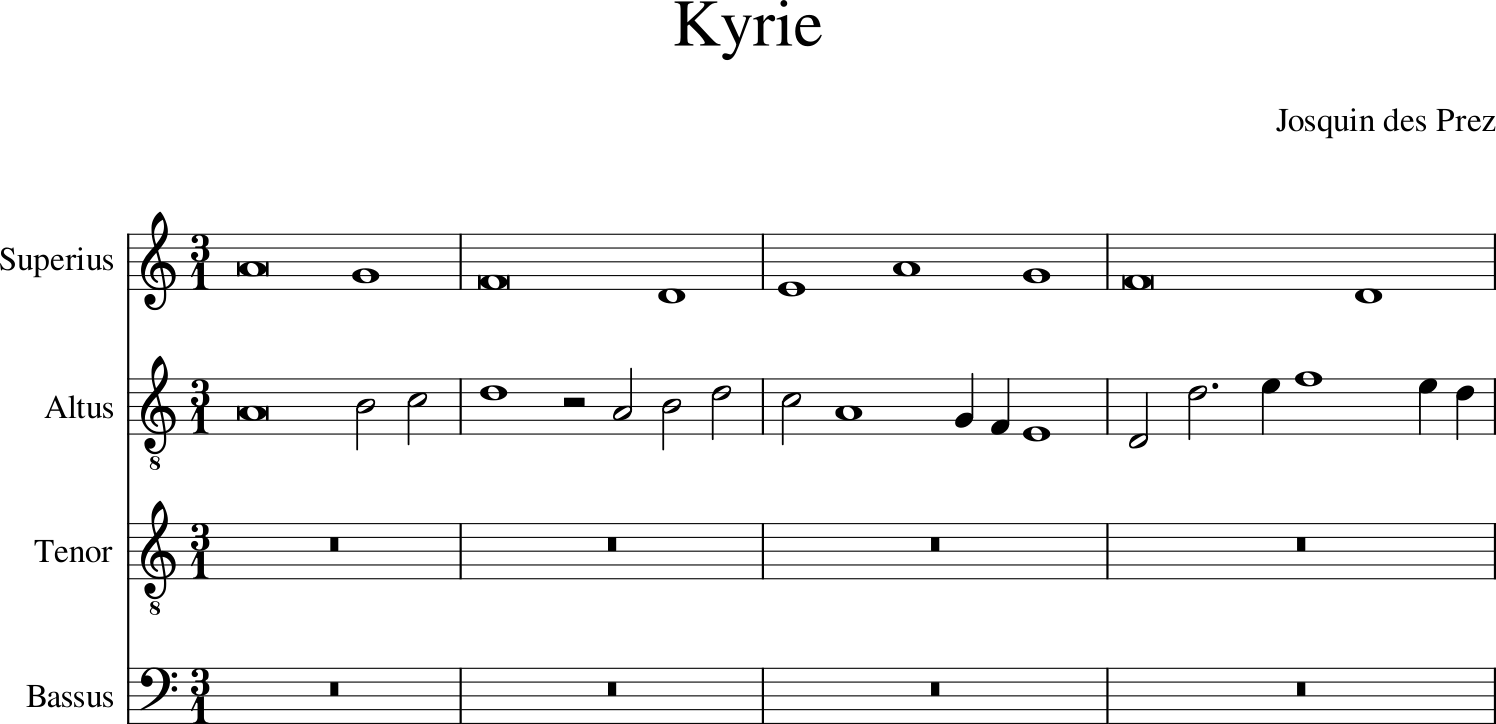

In [2]:
music = converter.parse('https://analyse.hfm-weimar.de/database/02/PrJode_Jos1102_COM_1-5_MissaLasol_002_00137.xml'
)
# 'music' is chosen as name (variable) for the loaded ('parsed') sheet music file.

music.measures(1, 4).show()


You can also listen to the piece - but only in a version with MIDI sounds (and only in the Chrome and Firefox browsers):

In [3]:
music.show('midi')

### 1. Retrieval of metadata and basic statical information <a id='A'></a>

All metadata stored in the MusicXML file about the examined work (composer, work title, year of creation, etc.) can be displayed with the following command:

In [4]:
music.metadata.all()

[('None', 'Jesse Rodin'),
 ('composer', 'Josquin des Prez'),
 ('movementName', 'Kyrie'),
 ('number', '1'),
 ('parentTitle', 'Missa La sol fa re mi')]

Now the simple statistical queries from the last tutorial: number of voices, number of notes (total and per voice), length in bars, ambitus, which we already learned about in the basics tutorial:

In [5]:
len(music.getElementsByClass(stream.Part))
# Number of voices
# 'local' is chosen as name (variable) for the loaded ('parsed') note file


4

In [6]:
len(music.getElementsByClass(stream.Part)[0].getElementsByClass(stream.Measure))
# Length in measures

58

In [7]:
a = len(music.getElementsByClass(stream.Part))
for x in range(a):
  print(len(music.parts[x].recurse().notes))
# Number of tones per voice

164
162
121
104


In [8]:
music.analyze('ambitus')
# Ambitus (all voices)

<music21.interval.Interval P19>

In [9]:
a = len(music.getElementsByClass(stream.Part))
for x in range(a):
  print(music.parts[x].analyze('ambitus'))
# Ambitus by voice

<music21.interval.Interval P11>
<music21.interval.Interval P12>
<music21.interval.Interval m10>
<music21.interval.Interval M9>


### 2. Frequencies: Pitches, pitch classes, tone durations <a id='B'></a>

In order to characterize individual pieces of music and to compare different pieces of music, it can be useful to determine the frequency of certain elements (pitches, duration values, chords, etc.). With regard to such issues, frequency tables and graphical representations, so-called histograms, can be generated.

#### 2.1 Pitch

Which tones appear how often? How diatonic is the tonal range of the Missa, how many additional chromatic notes appear?

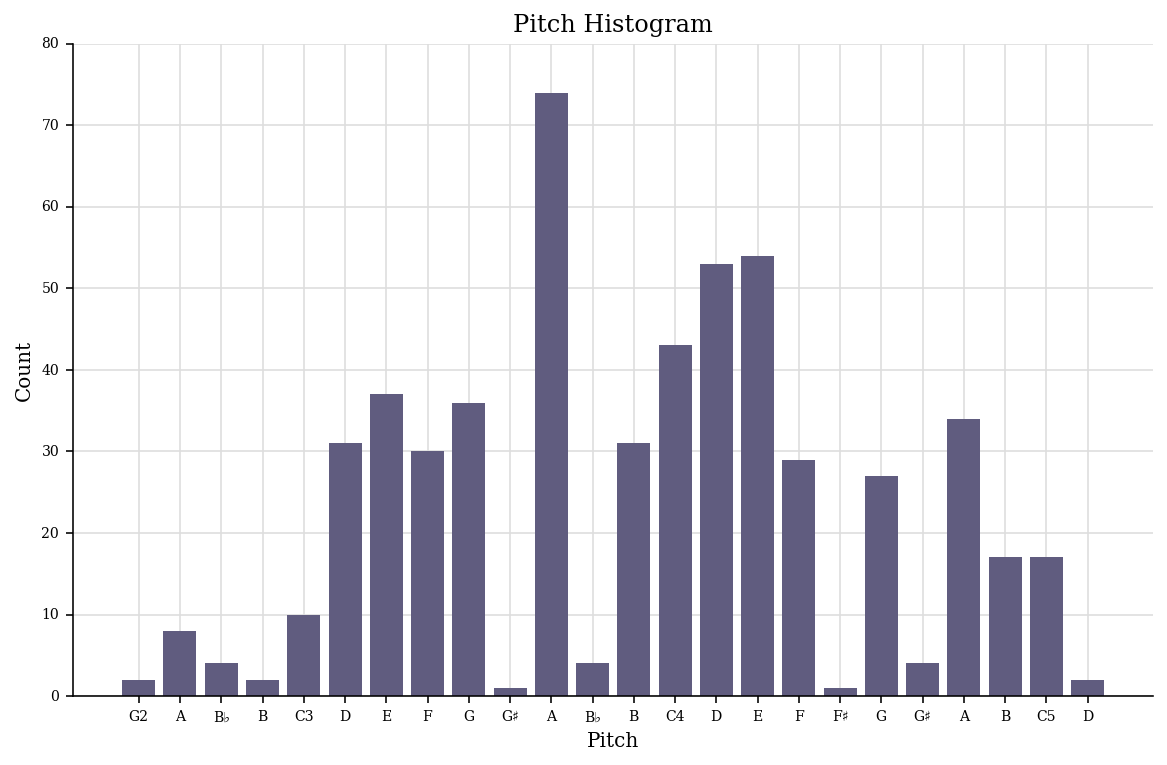

In [10]:
%matplotlib inline
music.plot('histogram', 'pitch')

What can we observe? The music is clearly diatonic whereas additional notes (F#, G# and Bb) are extremely rare.

In [11]:
%matplotlib 

# This command opens all the following graphical representations in a popup window. 
# and can be enlarged there (see Tutorial Basics). 

music.plot('histogram', 'pitch')

Using matplotlib backend: Qt5Agg


In [12]:
%matplotlib inline
# This command overrides the popup command again.  

The following command displays a list of pitch frequencies and exports it as a csv file (csv = comma separated variables; readable and processable in Excel or the text editor, among others). The export can be used to generate tables for comparison and corpus analysis. The csv file is saved in the folder that you have defined in your settings as "settings['directoryScratch']" and can be opened with a text editor or a spreadsheet program (e.g. Excel).

In [13]:
nameOctaveCount = analysis.pitchAnalysis.pitchAttributeCount(music, 'nameWithOctave')

notes_nameOctaveCount = [[i, nameOctaveCount[i]]for i in sorted(nameOctaveCount)]


export_as_csv(data=notes_nameOctaveCount, 
                    columns=['Notes With Octaves', 'Pitch'], 
                    save_at='NotesWithOctaves_test.csv',
                    do_print=True)

# if do_print iss set to True the table will be depicted within the browser.

Let us compare the Josquin Kyrie with the b-minor ballad of Franz Liszt. What do you notice? 

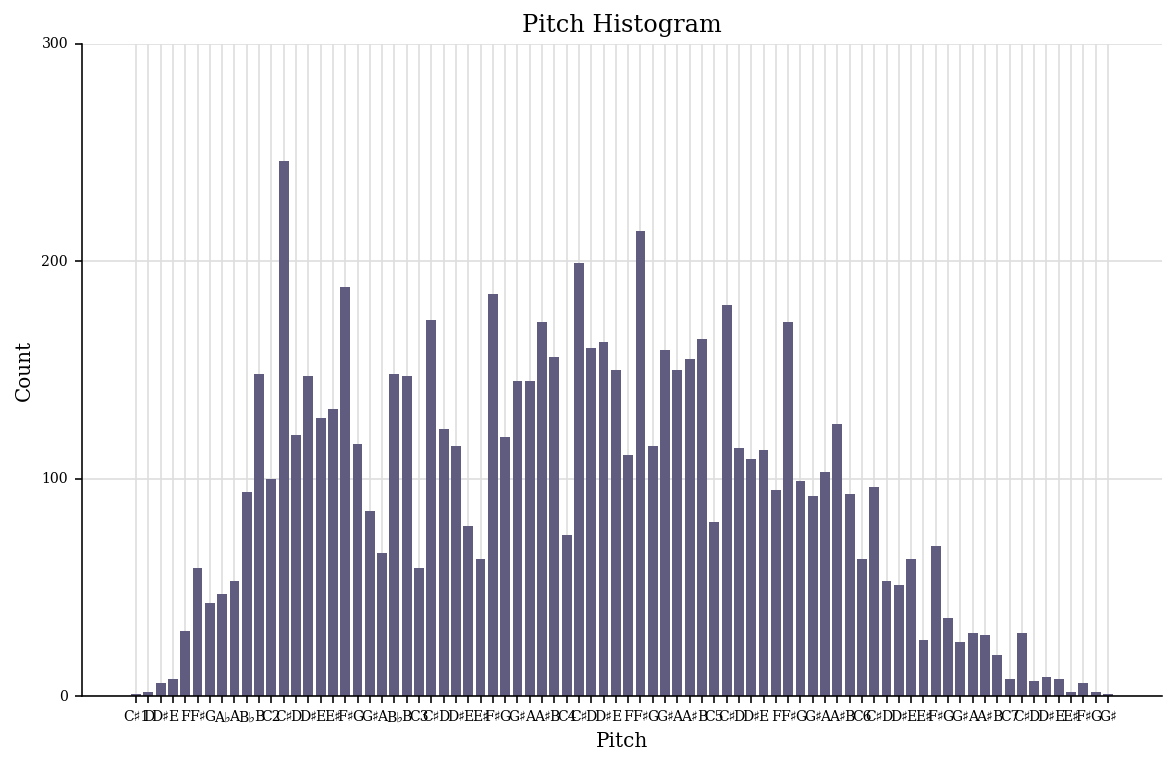

In [14]:
liszt = converter.parse('https://analyse.hfm-weimar.de/database/03/LiFra_S171_COM_COM_BalladeNo2_003_00822.xml')
liszt.plot('histogram', 'pitch')


#### 2.2 Pitch classes

The pitches can be combined into pitch classes in a second step. This makes the result clearer.

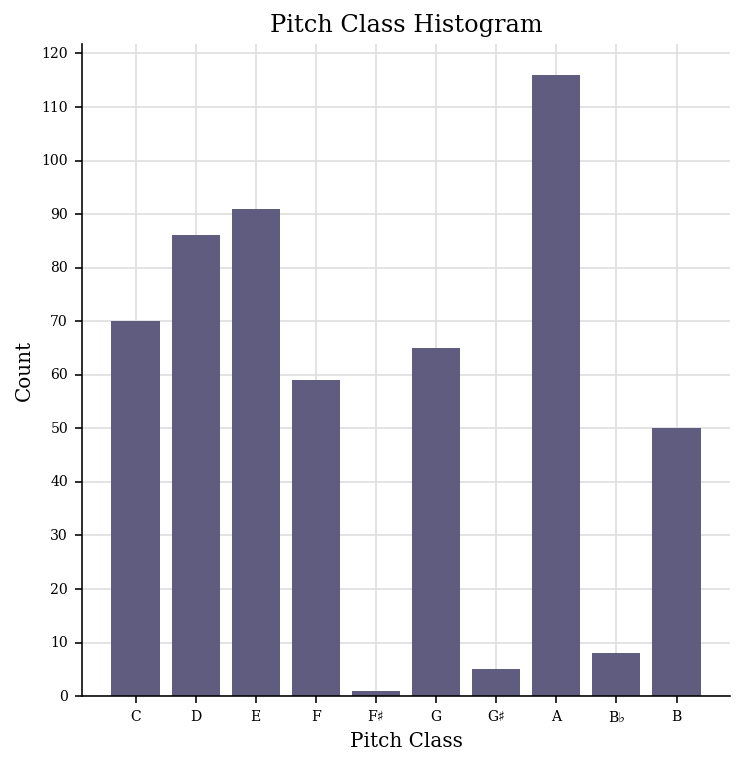

In [15]:
music.plot('histogram', 'pitchclass')

By the following commands the frequencies of the individual pitch classes can be displayed in a list and exported as csv file:

In [16]:
pcCount = analysis.pitchAnalysis.pitchAttributeCount(music, 'pitchClass')

l_pcCount = [[i, pcCount[i]]for i in sorted(pcCount)]


export_as_csv(data=l_pcCount, 
                    columns=['Pitch Class', 'Pitch'], 
                    save_at='pcCount.csv',
                    do_print=True)


And again: comparison with Liszt’s ballad: 

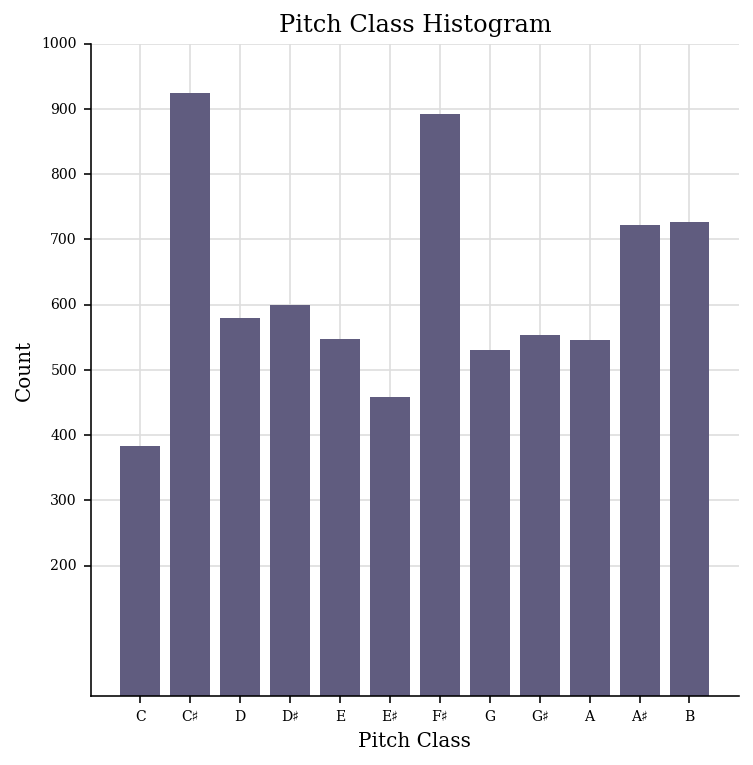

In [17]:
liszt.plot('histogram', 'pitchclass')

#### 2.3 Tone duration values

What duration values does Josquin use in his Missa, and how often does each value occur?

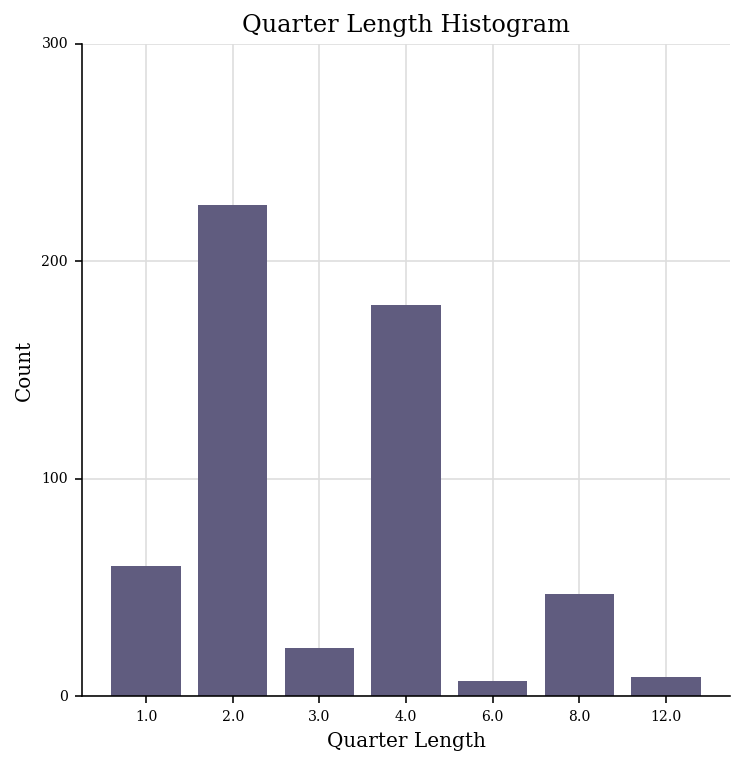

In [18]:
# For the histogram of duration values, a different command method must be used.
# The graph command must be combined with the Run command. 
 
duration = graph.plot.HistogramQuarterLength(music)
duration.run()


The note values are counted as multiples of a quarter (Quarter Lenght). The note text thus consists mainly of half notes (2.0) and whole notes (4.0); other note values are less frequent.

In [19]:
# And here again the command for export as csv file:

duration.extractData()
hist_data = duration.data
hist_data = [[i[0], i[1]] for i in hist_data]
export_as_csv(data=hist_data, 
                    columns=['Quater Length', 'Frequency'], 
                    save_at='duration_hist_data.csv',
                    do_print=False)

# if do_print iss set to True the table will be depicted within the browser.


#### 2.4 Metric accents: tones on different metric positions 

How clear is the meter in the individual voices of a composition. Basically, the degree of metrical clearness - through the placement of tones on measure beginnings and the metrically important positions within the measure (e.g. the middle of the measure or on the quarter positions)? For this purpose, a list of the frequencies of tones on the different metrical positions in the individual voices can be displayed.

The metrical accents follow the following weighting for the common time signatures (each for a sequence of eighth notes): in 4/4 time: 1.0, 0.125, 0.25, 0.125, 0.5, 0.125, 0.25, 0.125; in 3/4 time: 1.0, 0.25, 0.5, 0.25, 0.5, 0.25 etc..

This means: The beginning of the bar gets the highest weight with 1.0. 0.5 = middle weight, 0.25 lower weight and so on.


In [20]:
# With the following command, you can generate a list of the note beginnings
# in the bass voice with the respective time in the bar:

bass = music.parts[3]
for n in bass.flat.notes[:4]:# With [:4] only the first four entries or depicted.
    print(n, n.beatStrength)

<music21.note.Note A> 1.0
<music21.note.Note G> 0.5
<music21.note.Note F> 1.0
<music21.note.Note D> 0.5


In [21]:
# The command is a bit more complicated. 
# You don't need to understand these small command scripts. 
# But notice which variables are used or defined: 
# In the following case 'music' and 'bass'. 
# At these places you can write other variables if you want to evaluate other pieces / voices!

# With these commands the note and meter information is extracted from the bass voice.

bass = music.parts[3]

n_list, n_beat_strength = [],[]
l_bs = []

for n in bass.flat.notes:
    c_n = str(n)
    n_list.append(c_n.replace('<music21.note.Note ','').replace('>',''))
    n_beat_strength.append(float(n.beatStrength))


pd_bs = pd.DataFrame(np.array([n_list, n_beat_strength]).T, columns=['Notes', 'Beat_Strength'])
n_uni = pd_bs['Notes'].unique()
bs_uni = pd_bs['Beat_Strength'].unique()


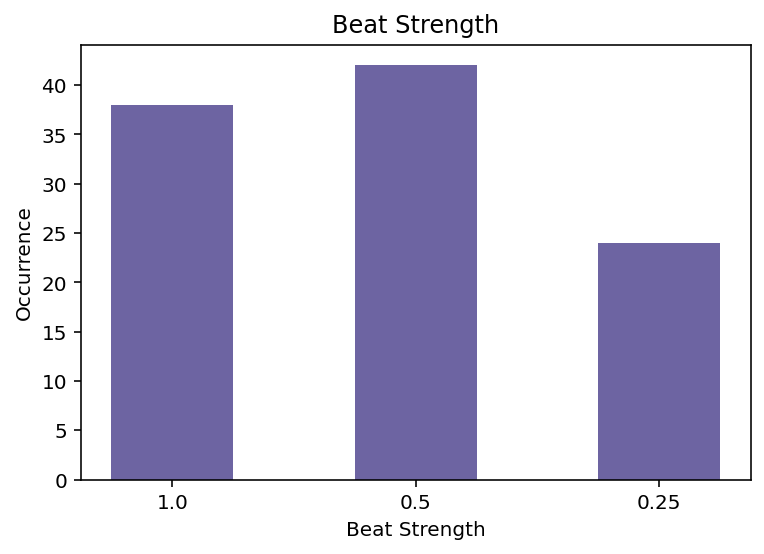

In [22]:
# Now histogram and csv list are displayed and saved. 

bs_int_indi = []
for c_bs_uni in bs_uni:
    l = len(pd_bs.loc[(pd_bs['Beat_Strength']==c_bs_uni)])
    bs_int_indi.append([c_bs_uni, l])
    
    
    
pd_bs_indi_data = export_as_csv(data=bs_int_indi, 
                    columns=['Beat_Strength', 'Occurrence'], 
                    save_at='beat_strength_freq_02.csv',
                    do_print=True, do_return_pd=True)


np_bs_indi_data = pd_bs_indi_data.to_numpy()
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.bar(np_bs_indi_data[:,0], np_bs_indi_data[:,1], width=0.5 ,color='darkslateblue', alpha=0.8)
ax2.set_title('Beat Strength')
ax2.set_xlabel('Beat Strength')
ax2.set_ylabel('Occurrence')
plt.show()

In the case of the "3/1 time signature", the 1.0 corresponds to the beginnings of the bar, the second and third whole positions in the bar, the 0.25 to the remaining half-positions.

### 3. Intervals in monophonic voices <a id='C'></a> 

Let us now go back to the Josquin example. How often do certain interval steps occur in the individual voices? Are all voices similar - or are there, for example, more leaps in the bass and more steps in the middle voices?

With music21, the answer to this question can only be found in several steps: First, a voice must be selected and designated with a new variable. 

Superius = 0, Altus = 1, Tenor = 2, Bassus = 3
Let's choose the bass voice.


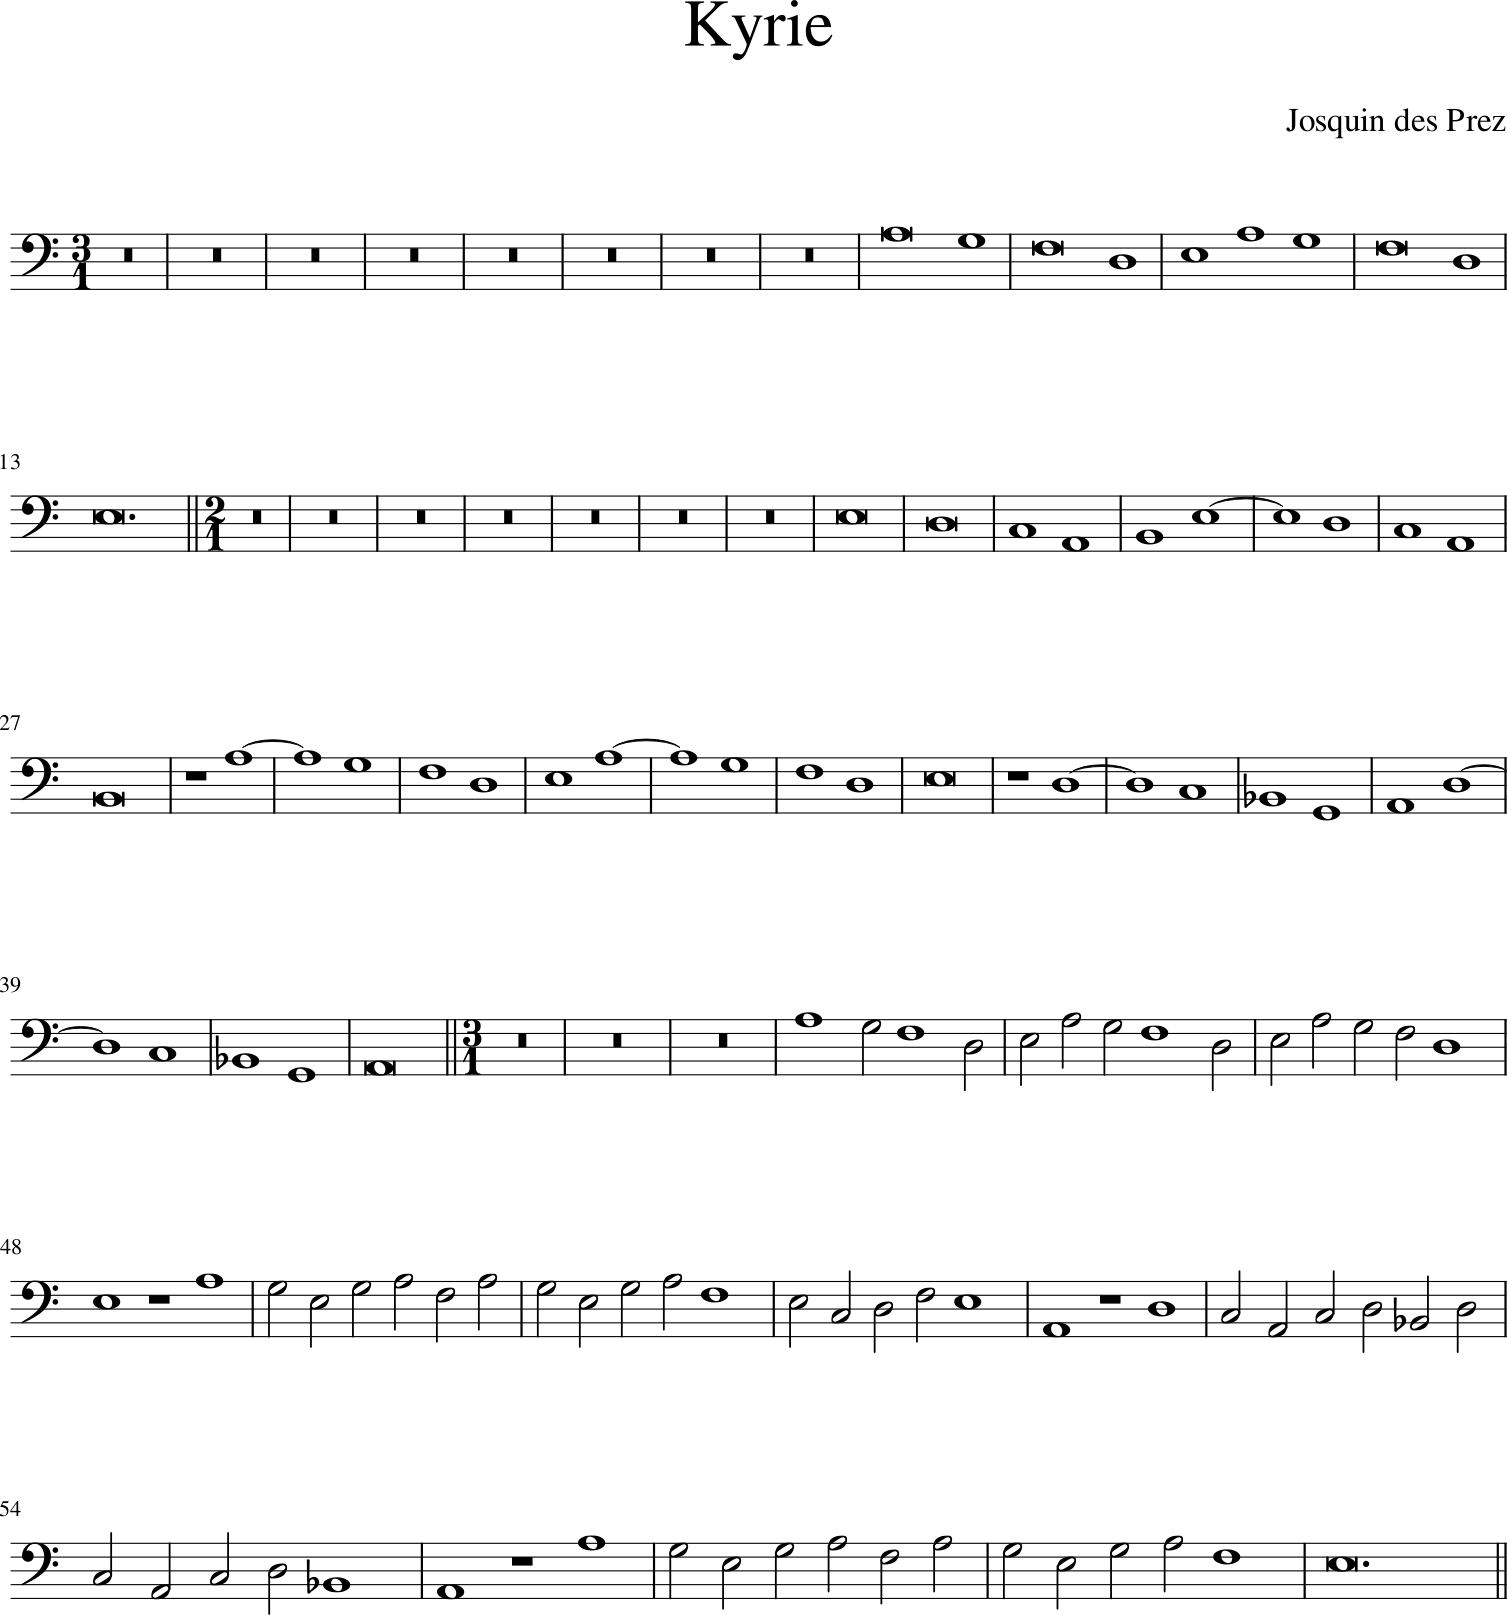

In [23]:
bass = music.parts[3]
bass.show()


The following command let you count the interval steps in the bass voice ('bass'):  

In [24]:
intervalle = analysis.discrete.MelodicIntervalDiversity()
intervalle.countMelodicIntervals(bass)
# The interval naming follows: 


{'M2': [<music21.interval.Interval M2>, 47],
 'm3': [<music21.interval.Interval m3>, 24],
 'P4': [<music21.interval.Interval P4>, 8],
 'm7': [<music21.interval.Interval m7>, 1],
 'P8': [<music21.interval.Interval P8>, 2],
 'M3': [<music21.interval.Interval M3>, 10],
 'm2': [<music21.interval.Interval m2>, 4],
 'P5': [<music21.interval.Interval P5>, 1]}

Now the comparison with the alto voice. What can be said from this about the nature of the progression of the two voices? Is it similar or different?

In [25]:
altus = music.parts[2]
intervalle.countMelodicIntervals(altus)


{'M2': [<music21.interval.Interval M2>, 60],
 'm3': [<music21.interval.Interval m3>, 21],
 'P4': [<music21.interval.Interval P4>, 13],
 'm2': [<music21.interval.Interval m2>, 15],
 'P5': [<music21.interval.Interval P5>, 8],
 'P8': [<music21.interval.Interval P8>, 1]}

The following commands can be used to export the list of interval frequencies or to display it as a histogram.

In [26]:
altus = music.parts[2]
m_int_cls = intervalle.countMelodicIntervals(altus)

int_cls = [[i, m_int_cls[i][1]] for i in m_int_cls]

pd_int_clas_data = export_as_csv(data=int_cls, 
                    columns=['Interval Class', 'Occurrence'], 
                    save_at='interval_class.csv',
                    do_print=True, do_return_pd=False)


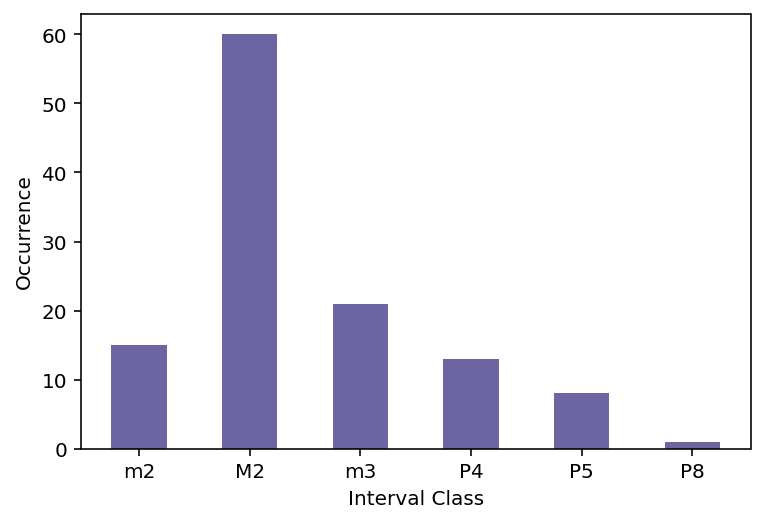

In [27]:
# The following commands generate a histogram of the interval frequencies.

d_st, d_st_nm = [],[]
for semitones in range(128):
    tempInt = interval.Interval(semitones)
    d_st.append(semitones)
    d_st_nm.append(tempInt.name)

st_dict = dict(zip(d_st_nm, d_st)) # dict to sort 
r_st_dict = {v: k for k, v in st_dict.items()}
int_cls_ids = [[st_dict[i[0]],i[1]] for i in int_cls]
sort_int_cls_ids = np.array(sorted(int_cls_ids,key=lambda x: x[0]))

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)

x = sort_int_cls_ids[:,0]
x = [r_st_dict[i[0]] for i in sort_int_cls_ids]

ax3.bar(x, sort_int_cls_ids[:,1], width=0.5 ,color='darkslateblue', alpha=0.8)
ax3.set_title('')
ax3.set_xlabel('Interval Class')
ax3.set_ylabel('Occurrence')
ax3.set_xticks(np.arange(np.shape(sort_int_cls_ids)[0]))
plt.show()


### 4. Two-dimensional frequency distributions <a id='D'></a>

We have already looked at the frequencies of pitches or pitch classes. Now we could say: Longer tones naturally have more weight than short tones or tones between beats. We can pursue this idea further by looking at combined, 'double' or 'bivariate' frequency distributions: So, for example, the frequencies of the pitches for each of the different duration values. This is what we will deal with in the following using two examples.

Example 1: Durations per pitch classes. Are there differences in the duration values with respect to the different pitch classes?


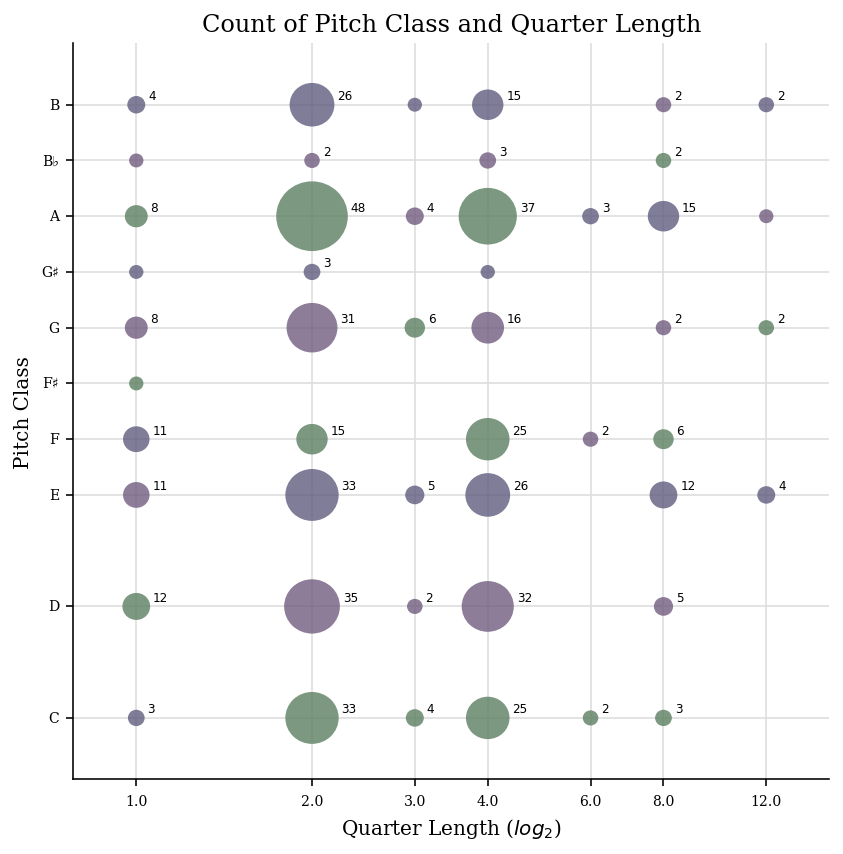

In [28]:
scatter1 = graph.plot.ScatterWeightedPitchClassQuarterLength(music)
scatter1.run()
# (The log2 on the x-axis means that the different music note values are not linearly arranged).

What can be gleaned from the graph?

There is another way of representing the relationship between pitches or pitch classes and sound durations: A 3-dimensional histogram:

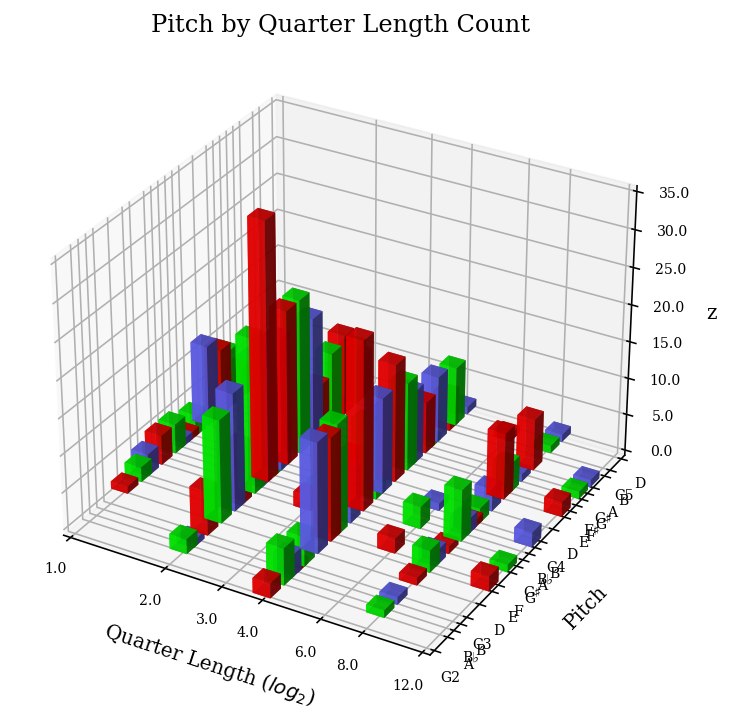

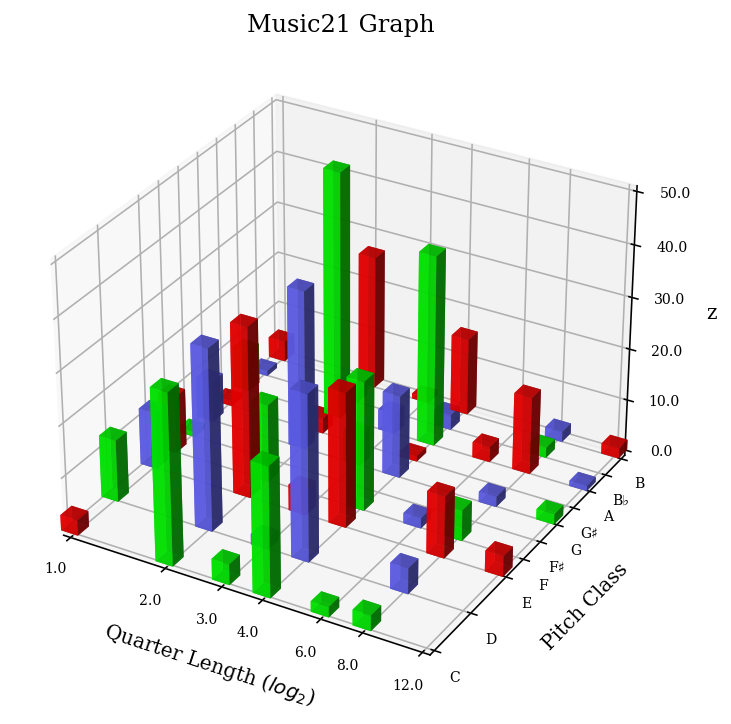

In [29]:
music.plot('3dbars', 'pitch', 'quarterLength')
music.plot('3dbars', 'pitchclass', 'quarterLength')


Example 2: Tones on the differently accented metric positions (see above, 2.4) in relation to pitch classes. For this again a somewhat more complex command is necessary:

Text(0.5, 0, 'Occurrence')

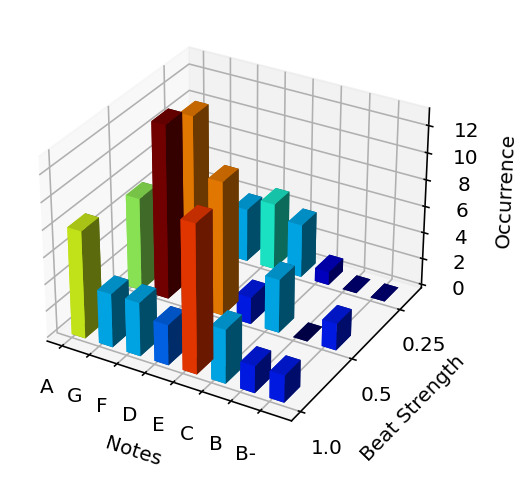

In [30]:
n_uni_int_dict = dict(zip(n_uni, np.arange(len(n_uni))))
bs_uni_int_dict = dict(zip(bs_uni, np.arange(len(bs_uni))))


for c_n_uni in n_uni:
    for c_bs_uni in bs_uni:
        l = len(pd_bs.loc[(pd_bs['Notes']==c_n_uni) & (pd_bs['Beat_Strength']==c_bs_uni)])
        l_bs.append([c_n_uni, c_bs_uni, l])

pd_bs_data = export_as_csv(data=l_bs, 
                    columns=['Note' ,'Beat_Strength', 'Occurrence'], 
                    save_at='beat_strength_freq.csv',
                    do_print=True, do_return_pd=True)
np_bs_data = pd_bs_data.to_numpy()


# --------- plotting -------
#print("Dict",n_uni_int_dict)
#print("Dict",bs_uni_int_dict)

plt_bs_data = np.zeros(np.shape(pd_bs_data))

for i in range(np.shape(np_bs_data)[0]):
    plt_bs_data[i][0] = n_uni_int_dict[np_bs_data[i][0]]
    plt_bs_data[i][1] = bs_uni_int_dict[np_bs_data[i][1]]
    plt_bs_data[i][2] = np_bs_data[i][2]


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm          

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
numele= np.shape(np_bs_data)[0]        

x = plt_bs_data[:,0]    
y = plt_bs_data[:,1]
z = np.zeros(numele)

dx = 0.5 * np.ones(numele)
dy = 0.3 * np.ones(numele)
dz = plt_bs_data[:,2]


cmap = cm.get_cmap('jet') # Get desired colormap
max_height = np.max(dz)   # get range of colorbars
min_height = np.min(dz)
rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax1.set_xticks(np.arange(len(n_uni)))
ax1.set_yticks(np.arange(len(bs_uni)))


ax1.bar3d(x, y, z, dx, dy, dz, color=rgba, zsort='average')

ax1.set_xticklabels(list(n_uni))
ax1.set_yticklabels([str(i) for i in bs_uni])
ax1.set_xlabel('Notes')
ax1.set_ylabel('Beat Strength')
ax1.set_zlabel('Occurrence')
#plt.savefig("Your_title_goes_here")


### 5. Tasks <a id='E'></a>

Comparative statistical queries over multiple pieces:

So far, we have looked at the results using only one piece at a time. But how does the situation change if we compare several pieces, e.g. several movements by Josquin, with each other - and with the pieces of one of his contemporaries? Are there really stylistic regularities - or are differences predominant?

Select compositions of your choice (different genres, composers, and periods) and compare these pieces with respect to frequencies of pitches, pitch classes, note values, and intervals. Describe the results!
